In [1]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.linear_model
%matplotlib inline

In [2]:
np.random.seed(1)#A seed is set to insure that result are consistance

In [3]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arrange(x_min, x_max, h), np.arrange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    y1 = y.reshape(200,)
    plt.scatter(X[0, :], X[1, :], c=y1, cmap=plt.cm.Spectral)

the shape of X is:(2, 200)
the shape of Y is:(1, 200)
number of training examples m = 200.


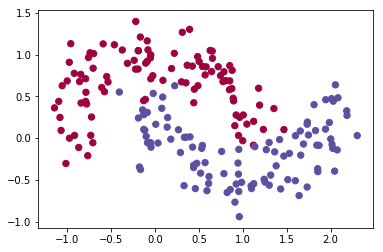

In [4]:
N = 200
noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise = .2)
X, Y = noisy_moons
X, Y = X.T, Y.reshape(1, Y.shape[0])#reshape the array to visualize the data
Y1 = Y.reshape(200,)
plt.scatter(X[0, :], X[1, :], c=Y1, s=40, cmap=plt.cm.Spectral)#matplotlib function to ;
shape_X = X.shape
shape_Y = Y.shape
m= X.shape[1]
print('the shape of X is:' + str(shape_X))
print('the shape of Y is:' + str(shape_Y))
print('number of training examples m = %d.' % (m))

In [5]:
def network_structure(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y) 

In [6]:
X1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
Y1 = np.array([1, 0])
(n_x, n_h, n_y) = network_structure(X1, Y1)
print("the size of input layer is: n_x = " + str(n_x))
print("the size of hidden layer is: n_h = " + str(n_h))
print("the size of output layer is: n_y = " + str(n_y))

the size of input layer is: n_x = 4
the size of hidden layer is: n_h = 4
the size of output layer is: n_y = 2


In [7]:
np.random.seed(1)

In [8]:
def parameters_init(n_x, n_h, n_y):
    np.random.seed(2)#we set up a seed so that your output matches ours although the init
    w1 = np.random.randn(n_h, n_x)#* 0.01
    b1 = np.zeros((n_h, 1))
    w2 = np.random.randn(n_y, n_h)#* 0.01
    b2 = np.zeros((n_h, 1))
    w1 = w1*0.005
    w2 = w2*0.005
#     assert (w1.shape == (n_h, n_x))
#     assert (b1.shape == (n_h, 1))
#     assert (w2.shape == (n_y, n_h))
#     print(b2.shape, (n_y, 1))
#     assert (b2.shape == (n_y, 1))
    parameters = {"w1" : w1,
                 "b1" : b1,
                 "w2" : w2,
                 "b2" : b2}
    return parameters

In [9]:
parameters = parameters_init(n_x, n_h, n_y)
print("w1 = " + str(parameters["w1"]))
print("b1 = " + str(parameters["b1"]))
print("w2 = " + str(parameters["w2"]))
print("b2 = " + str(parameters["b2"]))

w1 = [[-0.00208379 -0.00028133 -0.01068098  0.00820135]
 [-0.00896718 -0.00420874  0.00251441 -0.00622644]
 [-0.00528976 -0.00454504  0.00275727  0.01146104]
 [ 0.0002077  -0.00558963  0.00269529 -0.0029808 ]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
w2 = [[-9.56524826e-05  5.87500610e-03 -3.73935475e-03  4.51262549e-05]
 [-4.39053947e-03 -7.82170852e-04  1.28285226e-03 -4.94389524e-03]]
b2 = [[0.]
 [0.]
 [0.]
 [0.]]


In [10]:
def sigmoid(x):
    s = 1/(1 + np.exp(-x))
    return s

In [25]:
def forward_propogation(X, parameteres):
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(w1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = w2.dot(A1) + b2.reshape(-1)
    A2 = sigmoid(Z2)
    cache = {"Z1" : Z1,
            "A1" : A1,
            "Z2" : Z2,
            "A2" : A2}
    return A2, cache


In [26]:
#np.random.seed(1)
X_test = np.random.randn(4, 4)
A2, cache = forward_propogation(X_test, parameters)
print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))


0.005209962387427488 0.005209272398241904 -4.046311200746196e-06 0.49999898842220114


In [ ]:
def prediction_cost(A2, Y, parameters):
    m = Y.shape[1] #number of example
    #retrieve w1 and w2 fron parameters
    w1 = parameters["w1"]
    w2 = parameters["w2"]
    #compute cross entropy cost
    cross_entropy = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),1-Y)
    cost = - np.sum(cross_entropy)/m
    cost = np.squeeze(cost)#make sure cost is the dimention we axpect
                                # eg: turns[[17]] into 17
    assert(isinstance(cost, float))
    return cost

In [ ]:
def compute_cost_test_case():
    np.random.seed(1)
    Y_test = np.random.randn(1, 3)
    parameteres = {'w1' : np.array([[-0.00416758, -0.00056267],
                                   [-0.02136195, 0.01648271],
                                   [-0.01793436, -0.00841747],
                                   [0.00502881, -0.01245288]]),
                  'w2' : np.array([[-0.01057952, -0.00909]])}